# Import necessary libraries

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from six import StringIO
import pydotplus
from IPython.display import Image

# Load the dataset

In [2]:
df = pd.read_csv('diabetess.csv')

print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature and target separation with train test split

In [8]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols]
Y = df['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Mode training and prediction

In [4]:
# Create Decision Tree classifier and train it
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Evaluation


Model Accuracy: 74.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
[[75 24]
 [15 40]]


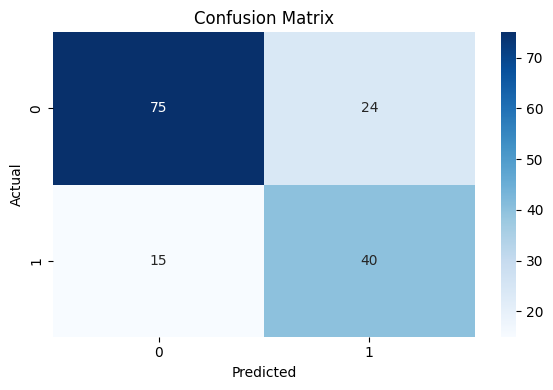

In [5]:
# Evaluate the model
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()


# Decision Tree Image

In [19]:
# Required imports
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

# Export the decision tree to DOT format
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

# Generate the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG image
graph.write_png("diabetes_tree.png")

# Display the image inline (only works in Jupyter)
Image(graph.create_png())

# Confirmation message
print("Decision tree image saved as 'diabetes_tree.png'")


Decision tree image saved as 'diabetes_tree.png'
